## Decision Tree
- It can be used to solve both types of problems i.e., Classification and Regression
- We always create decision tree in top-to-bottom approach

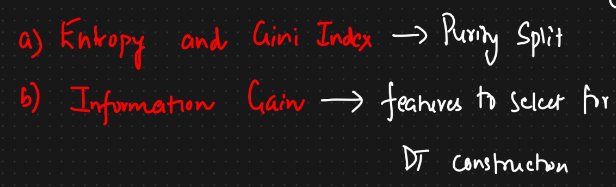

### Decision Tree Classifier
- There are mainly two types:
    - **ID3:** Whenever we create a decision tree, will may have more than binary splits
    - **CART:** currently the sklearn library uses this CART technique. In CART, whenever we create a decision tree, will create **"Binary splits"** with respect to each node

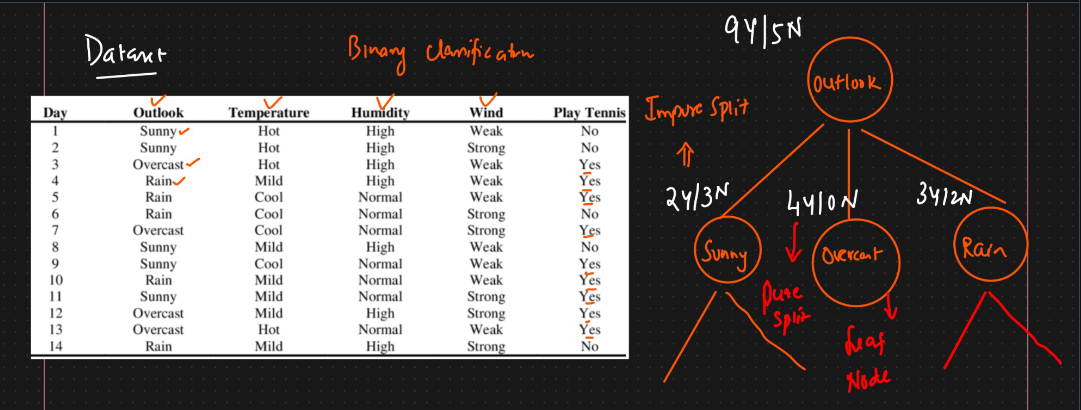

#### Purity: Pure or Impure Split
- If will get leaf node means if that node is having only one category, then it's pure split 
- Else Impure split
- To check the purity, will have two techniques:
    - **Entropy**
    - **Gini Impurity**

##### Entropy
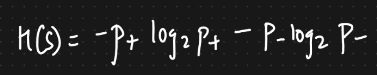
- In case of Binary classification, will have p+ and p- where p+ means probabiity of being positive while p- means probability of being negative
- In multiclass classification, it keeps on increasing like probability of being one category, probability of being second category, probability of being third category and so on

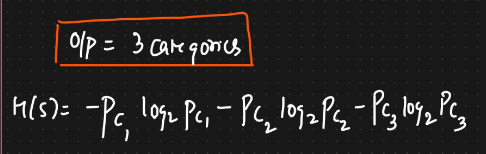
- The values of entropy for purity check will always in range between 0 to 1, 0 means pure max while 1 means impure max

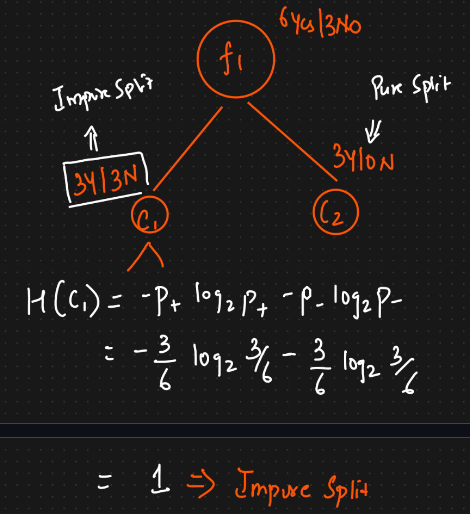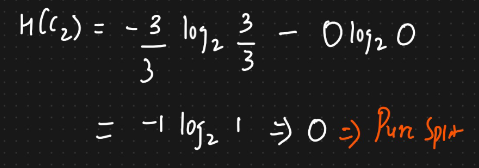

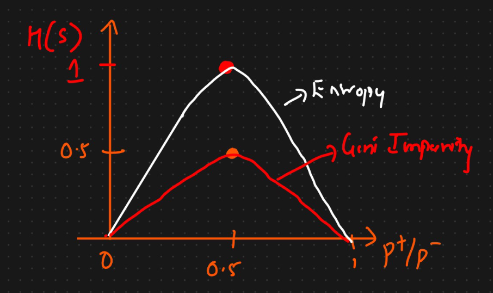

- Whenever the dataset is small, will choose "Entropy" because entropy formula having log which will be take time
- Whenever the dataset is large, will choose "Gini Impurity"
- By default, whenever we are using Decision Tree Classifier, Gini Impurity will get used

##### Gini Impurity
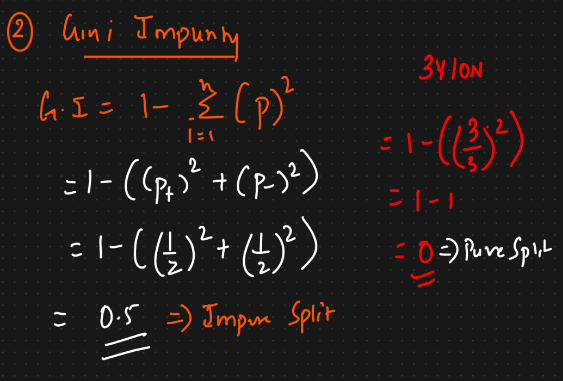

- In case of Gini Impurity, the value always range from 0 to 0.5, 0 means pure max while 0.5 means impure max

#### What feature we need to select for splitting
- The feature which gives leaf node quickly will be considered as best feature to select for split
- With the help of **Information Gain**, we can get the best feature for split

##### Information Gain
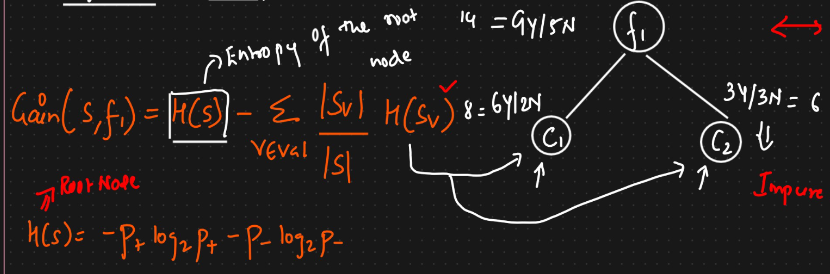
- Calculate the information gain for each feature split, **"highest / maximum"** gain will select as split feature
- Greater the information gain, will choose that feature to split

#### Decision Tree Split for Numerical Feature
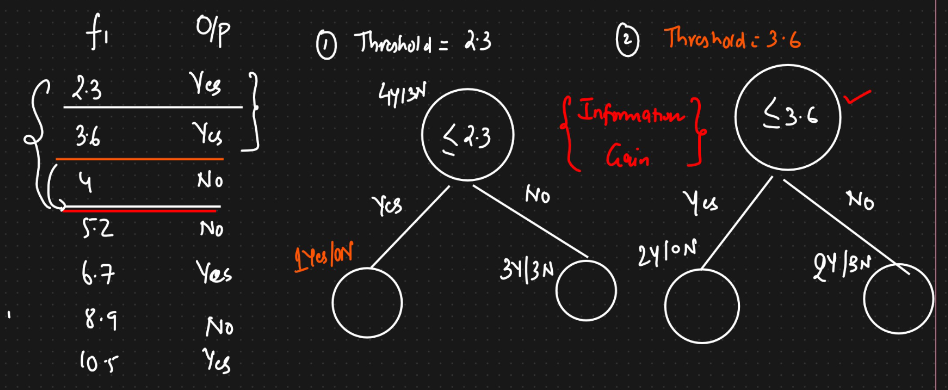
- Steps to split:
    - Sort the features value
    - Will create many decision tree, based on different different threshold values from features
    - Then find out the information gain, and greater the information gain will choose that threshold as best split feature
- Major disadvantage is when will have millions of records, time complexity will be very very high

#### Post Prunning and Pre Prunning
- Prunning means cutting down
- Whenever will create a decision tree to complete depth, it might lead to overfitting problem (training accuracy is very high: low bias, test accuracy will be low: high variance)
- so to prevent the problem of overfitting, will have two techniques: post prunning and pre prunning

- **Post Prunning:** after creating the decision tree to complete depth, will cut it down (prun it with respect to depth) from where we feel like the ratio of output categories is having large difference
- NOTE: Post Prunning will be applied on smaller dataset, as if dataset is large it will take lot of time to first create the complete decision tree and then prun it

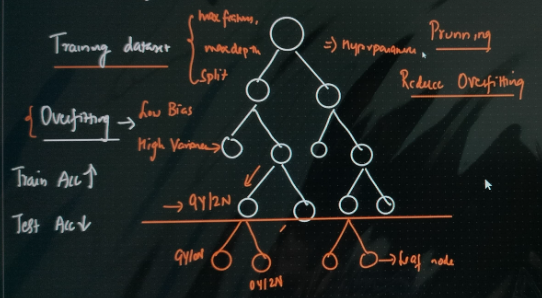

- **Pre Prunning:** while you are creating or constructing the decision tree, play with different parameters value using hyperparameter tuning 

### Decision Tree Regression
- here entropy, gini impurity, information gain these techniques are not present
- here we have **"Variance"** and **"Variance Reduction"** as to get variance reduction, we first need to calculate variance of each node (root node and child nodes)
- Greater the Variance Reduction, will choose that feature split as best split feature
- also for new test point, the average values of leaf nodes will be the output feature value for the test point

- **Variance:** here y is each output while ŷ is the average of output feature, n is number of output having in that node

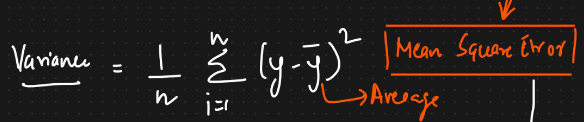

- **Variance Reduction:** here the Wi is weight, like for that child node: Wi will be ratio of (that node output/total possible output)

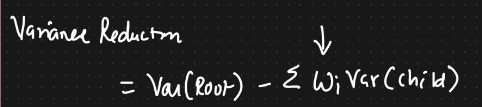

#### Example:
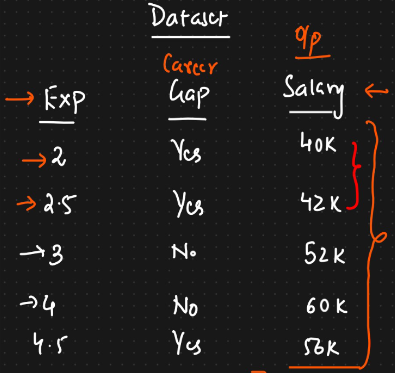

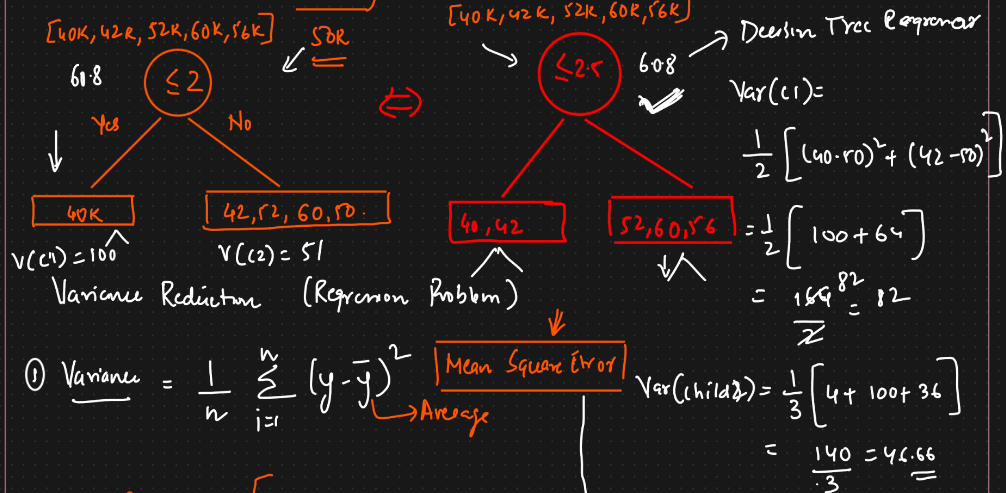

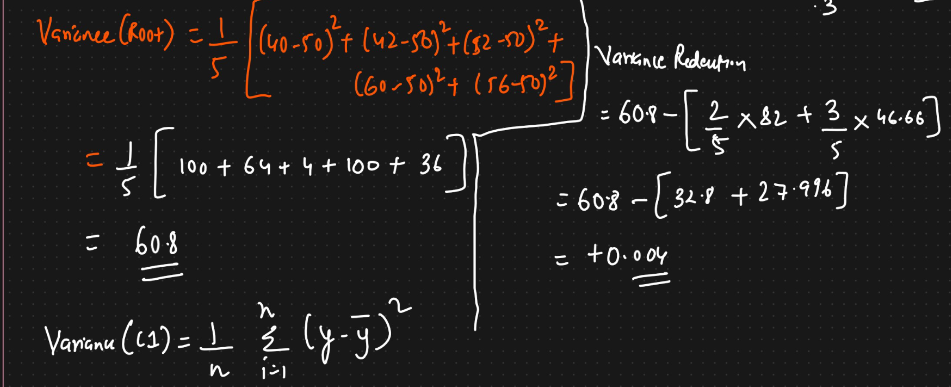

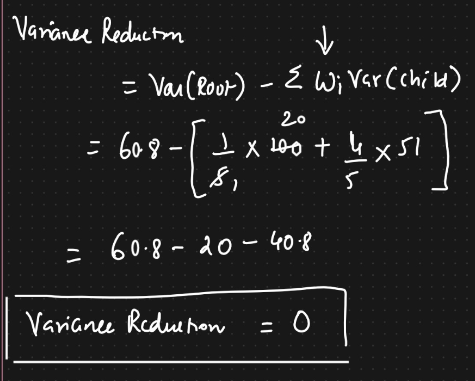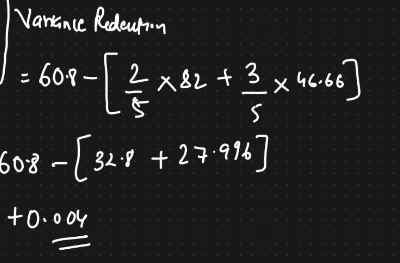

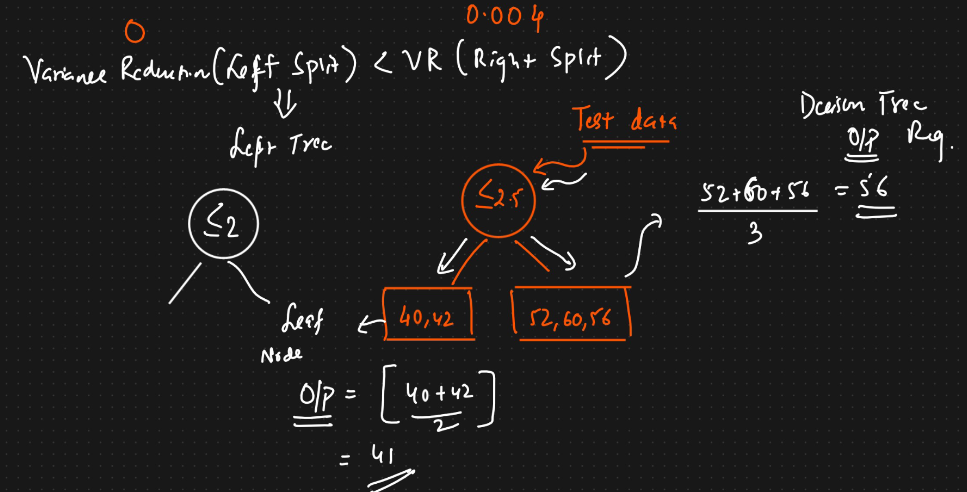

## Practical of decision tree claasifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
X=pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])
y=iris['target']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [6]:
from sklearn.tree import DecisionTreeClassifier

treeclaasifier=DecisionTreeClassifier()
treeclaasifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= 6.5\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue

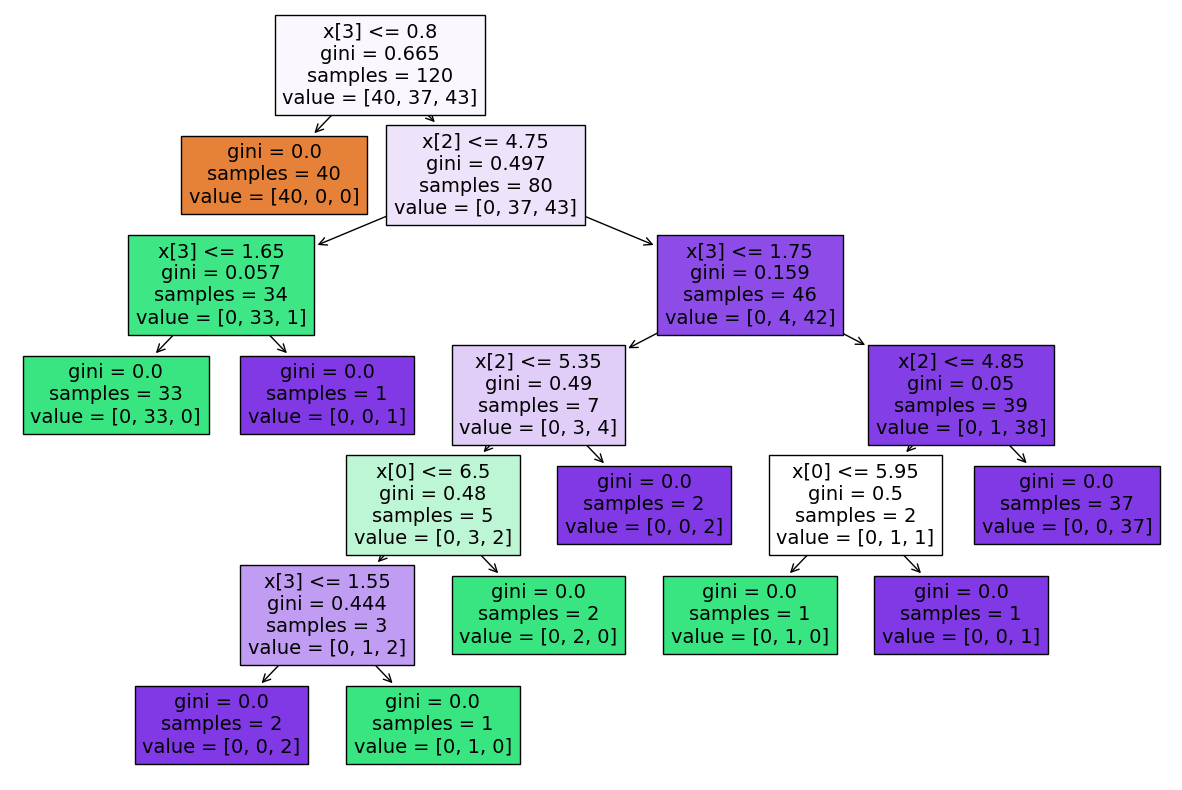

In [7]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclaasifier,filled=True)

In [8]:
y_pred=treeclaasifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



whatever parameters are present in DecisionTreeClassifier(), we can do post prunning and pre prunning by using hyperparameter tuning using GridSearchCV or RandomizedSearchCV to get the best parameters for the dataset

as in the above dataset, after max_depth=2, we dont need to do further splits as it's not at all required

In [9]:
params={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(treeclaasifier,param_grid=params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


## Practical of decision tree regressor

In [12]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [13]:
X=pd.DataFrame(dataset['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
y=dataset['target']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
from sklearn.tree import DecisionTreeRegressor

treereg=DecisionTreeRegressor()
treereg.fit(X_train,y_train)

DecisionTreeRegressor()

[Text(0.5419063724029292, 0.9722222222222222, 'x[8] <= -0.0\nsquared_error = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.33004885473433243, 0.9166666666666666, 'x[2] <= 0.006\nsquared_error = 3179.573\nsamples = 183\nvalue = 113.268'),
 Text(0.21323122445504086, 0.8611111111111112, 'x[5] <= 0.105\nsquared_error = 2181.501\nsamples = 140\nvalue = 100.221'),
 Text(0.2105064288147139, 0.8055555555555556, 'x[6] <= 0.021\nsquared_error = 2028.064\nsamples = 139\nvalue = 99.122'),
 Text(0.10228627384196186, 0.75, 'x[1] <= 0.003\nsquared_error = 2546.201\nsamples = 73\nvalue = 110.068'),
 Text(0.05913658038147139, 0.6944444444444444, 'x[6] <= 0.017\nsquared_error = 2838.332\nsamples = 33\nvalue = 125.97'),
 Text(0.0421491825613079, 0.6388888888888888, 'x[9] <= -0.057\nsquared_error = 2640.4\nsamples = 31\nvalue = 121.29'),
 Text(0.01634877384196185, 0.5833333333333334, 'x[2] <= -0.034\nsquared_error = 986.222\nsamples = 6\nvalue = 160.667'),
 Text(0.010899182561307902, 0.52777777777777

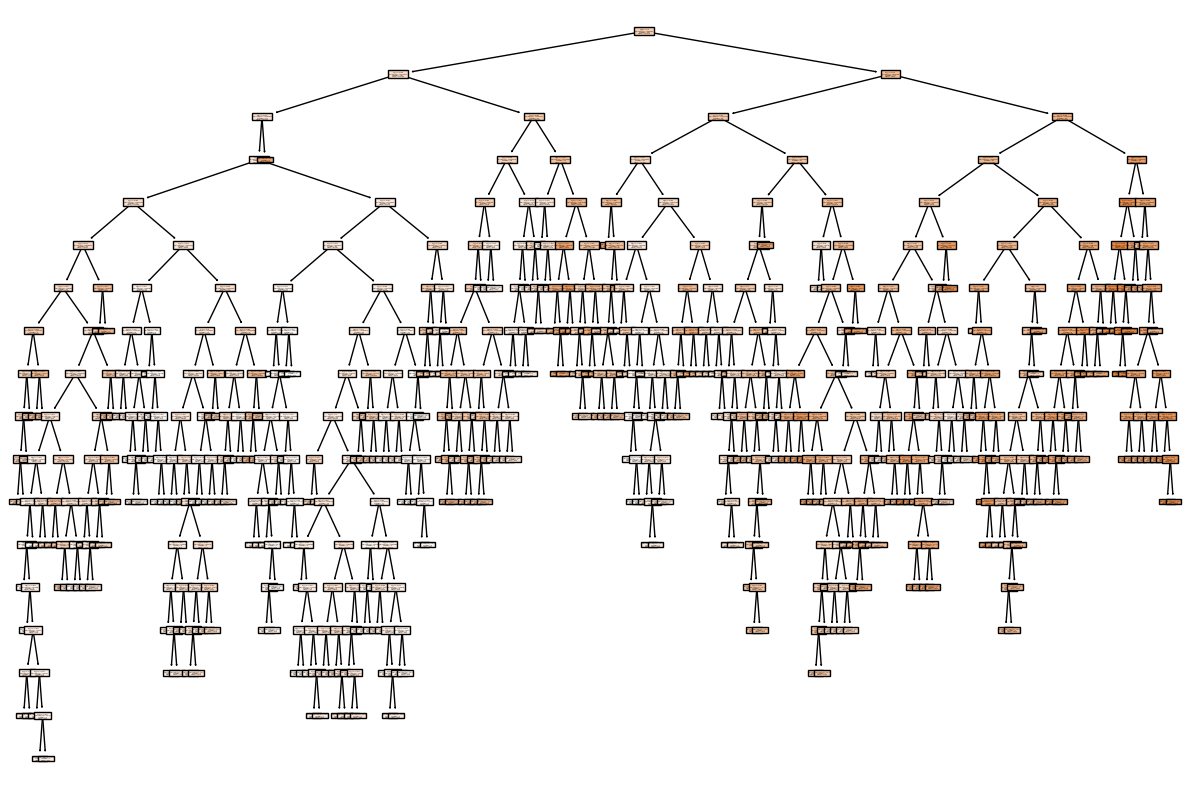

In [17]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treereg,filled=True)

we can do hyperparameter tuning to get the best parameter values

In [16]:
y_pred=treereg.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

-0.05245750437033281
6579.112359550561
62.662921348314605
